In [76]:
from collections import Counter
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

# Loading data

In [4]:
path = 'flatland_train.data'
X, y = pickle.load(gzip.open(path, 'rb'))

# data pre-proc
y[y != 0] -= 2  # labels from 0 to 4
X = X / 255.    # in range [0,1]

In [5]:
Counter(y)

Counter({2.0: 1868, 4.0: 1761, 3.0: 2137, 1.0: 2853, 0.0: 1381})

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [117]:
X_train.shape

(7500, 50, 50)

In [118]:
y_train.shape

(7500,)

# DNN 
Deep neural network

In [154]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(5, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(3e-4),
              metrics = ['accuracy'])
# if you use categorical_crossentropy, then it expect one hot encoded output
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 2500)              0         
                                                                 
 dense_30 (Dense)            (None, 100)               250100    
                                                                 
 dense_31 (Dense)            (None, 5)                 505       
                                                                 
Total params: 250,605
Trainable params: 250,605
Non-trainable params: 0
_________________________________________________________________


In [159]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6159 - accuracy: 0.7701 - val_loss: 0.7832 - val_accuracy: 0.6884
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.5822 - accuracy: 0.7940 - val_loss: 0.7664 - val_accuracy: 0.6948
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.5571 - accuracy: 0.8011 - val_loss: 0.7613 - val_accuracy: 0.6932
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.5331 - accuracy: 0.8069 - val_loss: 0.7384 - val_accuracy: 0.7060
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.5096 - accuracy: 0.8176 - val_loss: 0.7406 - val_accuracy: 0.7048
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4913 - accuracy: 0.8276 - val_loss: 0.7590 - val_accuracy: 0.7140
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4718 - accuracy: 0.8341 - val_loss: 0.7057 - val_accuracy: 0.7144
Epoch 

<AxesSubplot:>

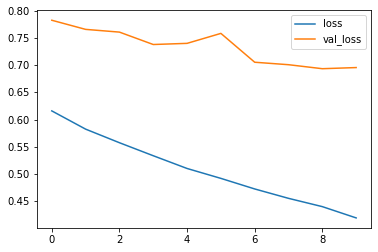

In [160]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

In [161]:
model.save('model.h5')

# Test your model

In [162]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.8319